In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange
from pystackreg import StackReg
import multiprocessing as mp
import timeit
from tqdm import tqdm
from tifffile import TiffFile
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 256


In [2]:
# need to change
ipts="30610"
# scan_type = 'ct_scans'
scan_type = 'radiographs'
# scan_type = 'alignment_calibration'

In [3]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['2023_08_01_dehydration',
 '2023_08_01_hydration',
 '2023_08_03_calibration',
 '2023_08_03_dehydration2',
 '2023_08_03_hydration',
 '2023_08_03_throughflow',
 '2023_08_03_throughflow_td_b_h',
 '2023_08_07',
 '2023_08_07_calibration']

In [5]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
sorted(os.listdir(ob_loc))

['2023_08_01_alignment',
 '2023_08_03_calibration',
 '2023_08_07',
 '2023_08_11_1H',
 '2023_08_12']

In [6]:
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/dc"
# dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
sorted(os.listdir(dc_loc))

['2023_08_01_alignment', '2023_08_12']

In [8]:
###################### need to change start
sample_name = "2023_08_01_dehydration"
scan_dir = os.path.join(scan_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2023_08_01_alignment")
dc_dir = os.path.join(dc_loc, "2023_08_01_alignment")
###################### need to change end

# Sort and filter scan files

In [9]:
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()
print(len(fname_list))
fname_list

1265


['20230802_dehydrating_0030_2012.tiff',
 '20230802_dehydrating_0030_2013.tiff',
 '20230802_dehydrating_0030_2014.tiff',
 '20230802_dehydrating_0030_2015.tiff',
 '20230802_dehydrating_0030_2016.tiff',
 '20230802_dehydrating_0030_2017.tiff',
 '20230802_dehydrating_0030_2018.tiff',
 '20230802_dehydrating_0030_2019.tiff',
 '20230802_dehydrating_0030_2020.tiff',
 '20230802_dehydrating_0030_2021.tiff',
 '20230802_dehydrating_0030_2022.tiff',
 '20230802_dehydrating_0030_2023.tiff',
 '20230802_dehydrating_0030_2024.tiff',
 '20230802_dehydrating_0030_2025.tiff',
 '20230802_dehydrating_0030_2026.tiff',
 '20230802_dehydrating_0030_2027.tiff',
 '20230802_dehydrating_0030_2028.tiff',
 '20230802_dehydrating_0030_2029.tiff',
 '20230802_dehydrating_0030_2030.tiff',
 '20230802_dehydrating_0030_2031.tiff',
 '20230802_dehydrating_0030_2032.tiff',
 '20230802_dehydrating_0030_2033.tiff',
 '20230802_dehydrating_0030_2034.tiff',
 '20230802_dehydrating_0030_2035.tiff',
 '20230802_dehydrating_0030_2036.tiff',


In [10]:
to_rmv = [
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)

1265
1265


In [13]:
ob_list = os.listdir(ob_dir)
# fname_list.pop(0)
ob_list.sort()
print(len(ob_list))
# ob_list = ob_list[:3]
ob_list

5


['20230801_OB_0030_0020.tiff',
 '20230801_OB_0030_0021.tiff',
 '20230801_OB_0030_0022.tiff',
 '20230801_OB_0030_0023.tiff',
 '20230801_OB_0030_0024.tiff']

In [14]:
to_rmv = [
]
ob_list = rocku.remove_fnames(ob_list, to_rmv)
# ob_list = rocku.filter_list(ob_list, '_71fps_2x2_')
print(len(ob_list))
ob_list

5
5
5


['20230801_OB_0030_0020.tiff',
 '20230801_OB_0030_0021.tiff',
 '20230801_OB_0030_0022.tiff',
 '20230801_OB_0030_0023.tiff',
 '20230801_OB_0030_0024.tiff']

In [15]:
dc_list = os.listdir(dc_dir)
# fname_list.pop(0)
dc_list.sort()
print(len(dc_list))
dc_list

5


['20230801_DC_0030_0015.tiff',
 '20230801_DC_0030_0016.tiff',
 '20230801_DC_0030_0017.tiff',
 '20230801_DC_0030_0018.tiff',
 '20230801_DC_0030_0019.tiff']

In [16]:
to_rmv = [
]
dc_list = rocku.remove_fnames(dc_list, to_rmv)

5
5


In [17]:
scan_exposure_list = rocku.get_exposure_list(fname_list)
ob_exposure_list = rocku.get_exposure_list(ob_list)
dc_exposure_list = rocku.get_exposure_list(dc_list)
exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
exposure_list

['_0030_']

In [18]:
_fname_list = rocku.filter_list(fname_list, exposure_list[0])
_fname_list

['20230802_dehydrating_0030_2012.tiff',
 '20230802_dehydrating_0030_2013.tiff',
 '20230802_dehydrating_0030_2014.tiff',
 '20230802_dehydrating_0030_2015.tiff',
 '20230802_dehydrating_0030_2016.tiff',
 '20230802_dehydrating_0030_2017.tiff',
 '20230802_dehydrating_0030_2018.tiff',
 '20230802_dehydrating_0030_2019.tiff',
 '20230802_dehydrating_0030_2020.tiff',
 '20230802_dehydrating_0030_2021.tiff',
 '20230802_dehydrating_0030_2022.tiff',
 '20230802_dehydrating_0030_2023.tiff',
 '20230802_dehydrating_0030_2024.tiff',
 '20230802_dehydrating_0030_2025.tiff',
 '20230802_dehydrating_0030_2026.tiff',
 '20230802_dehydrating_0030_2027.tiff',
 '20230802_dehydrating_0030_2028.tiff',
 '20230802_dehydrating_0030_2029.tiff',
 '20230802_dehydrating_0030_2030.tiff',
 '20230802_dehydrating_0030_2031.tiff',
 '20230802_dehydrating_0030_2032.tiff',
 '20230802_dehydrating_0030_2033.tiff',
 '20230802_dehydrating_0030_2034.tiff',
 '20230802_dehydrating_0030_2035.tiff',
 '20230802_dehydrating_0030_2036.tiff',


In [19]:
######### Scan
_scan_raw = rocku.read_tiff_stack(scan_dir, [_fname_list[0], _fname_list[-1]])
print(_scan_raw.shape)

2


(2, 2048, 2048)


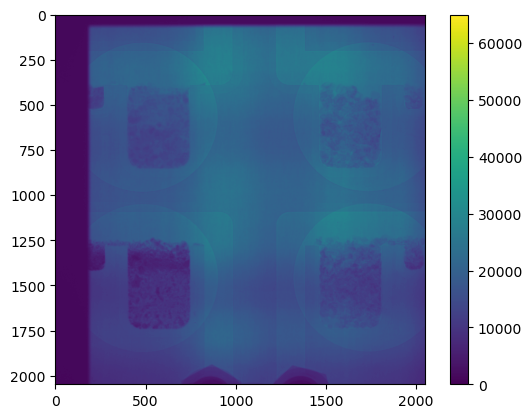

In [23]:
_scan_min = np.min(_scan_raw, axis=0)
plt.imshow(_scan_min, vmin=0, vmax=65000)
plt.colorbar()
plt.show()

ROI:


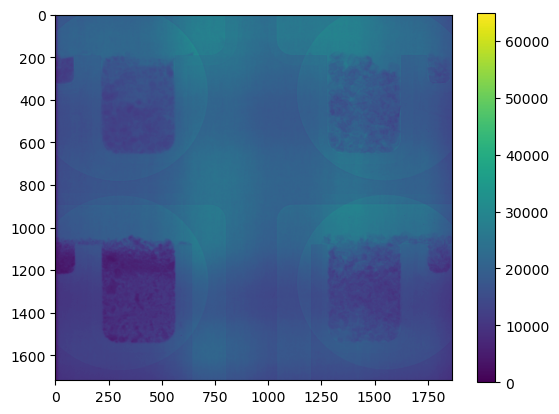

In [31]:
###################### need to change start
crop = True
# crop = False
crop_left = 183#320
crop_right = -1#1080
crop_top = 200
crop_bottom = -130
# crop_left = 550
# crop_right = 1300
# crop_top = 300
# crop_bottom = 1700
###################### need to change end
# scan_crop = rocku.crop(scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
_scan_crop_min = rocku.crop(_scan_min, crop_left, crop_right, crop_top, crop_bottom, crop)
print("ROI:")
plt.imshow(_scan_crop_min, vmin=0, vmax=65000)
plt.colorbar()
plt.show()

# Normalize the selected list

In [32]:
scan_list = sorted(os.listdir(scan_loc))
scan_list

['2023_08_01_dehydration',
 '2023_08_01_hydration',
 '2023_08_03_calibration',
 '2023_08_03_dehydration2',
 '2023_08_03_hydration',
 '2023_08_03_throughflow',
 '2023_08_03_throughflow_td_b_h',
 '2023_08_07',
 '2023_08_07_calibration']

In [33]:
to_rmv = [
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

9
9


['2023_08_01_dehydration',
 '2023_08_01_hydration',
 '2023_08_03_calibration',
 '2023_08_03_dehydration2',
 '2023_08_03_hydration',
 '2023_08_03_throughflow',
 '2023_08_03_throughflow_td_b_h',
 '2023_08_07',
 '2023_08_07_calibration']

In [35]:
# ignore_dc = True
ignore_dc = False
outlier_rmv_size = 3
gamma_diff_raw = 20
gamma_diff_norm = 0.2
##################################################
for each_scan in scan_list:
    scan_dir = os.path.join(scan_loc, each_scan)
    fname_list = sorted(os.listdir(scan_dir))
    scan_exposure_list = rocku.get_exposure_list(fname_list)
    exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
    save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized/" + each_scan# + '_Right'
    print("######################### Normalizing and saving to: '{}'".format(save_to))
    for each_exposure in exposure_list:
        if len(exposure_list) > 1:
            print("##### Exposure time: {}".format(each_exposure))
        _fname_list = rocku.filter_list(fname_list, each_exposure)
        _ob_list = rocku.filter_list(ob_list, each_exposure)
        _dc_list = rocku.filter_list(dc_list, each_exposure)
        ######### OB
        _ob_raw = rocku.read_tiff_stack(ob_dir, _ob_list)
        print(_ob_raw.shape)
        _ob_crop = rocku.crop(_ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        _ob_crop = tomopy.misc.corr.remove_outlier_cuda(_ob_crop, gamma_diff_raw).astype(np.ushort)
        ######### DC
        _dc_raw = rocku.read_tiff_stack(dc_dir, _dc_list)
        print(_dc_raw.shape)
        _scan_raw = dxchange.read_tiff(os.path.join(scan_dir, _fname_list[0]))
        _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        if not ignore_dc:
            _dc_crop = rocku.crop(_dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _dc_crop = tomopy.remove_outlier(_dc_crop, gamma_diff_raw, size=outlier_rmv_size).astype(np.ushort)
            _scan_crop, _ob_mi_dc, _dc_med = rocku.subtract_dc(_scan_crop, _ob_crop, _dc_crop)
            # _dc_med = _dc_med - 2
        else:
            _scan_crop, _ob_mi_dc, _dc_med = rocku.subtract_dc(_scan_crop, _ob_crop, None)
        ######### Scan
        for each_f in tqdm(_fname_list):
            _scan_raw = dxchange.read_tiff(os.path.join(scan_dir, each_f))
            # print(_scan_raw.shape)
            _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _scan_crop = tomopy.remove_outlier(_scan_crop, gamma_diff_raw, size=outlier_rmv_size).astype(np.ushort)
            if not ignore_dc:
                _scan_mi_dc = _scan_crop - _dc_med 
            else:
                _scan_mi_dc = _scan_crop[:]
            _scan_norm = np.true_divide(_scan_mi_dc, _ob_mi_dc, dtype=np.float32)
            _scan_norm = tomopy.remove_outlier(_scan_norm, gamma_diff_norm, size=outlier_rmv_size)
            _scan_norm = tomopy.remove_nan(_scan_norm)
            _scan_norm = tomopy.remove_neg(_scan_norm)
            # _scan_norm = np.clip(_scan_norm, a_min=-0.1, a_max=1.1)
            # _scan_norm = np.flipud(_scan_norm)
            # _scan_norm, _scan_mi_dc, _ob_mi_dc, _dc_med = rocku.normalize(_scan_crop, _ob_crop, _dc_crop)
            # Save files
            save_to_fname = save_to + "/" + each_f
            dxchange.write_tiff(_scan_norm, fname=save_to_fname, overwrite=True)

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_01_dehydration'
5


(5, 2048, 2048)


5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|███████████████████████████████████████| 1265/1265 [03:37<00:00,  5.82it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_01_hydration'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|███████████████████████████████████████| 1985/1985 [06:32<00:00,  5.06it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_03_calibration'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|███████████████████████████████████████████| 20/20 [00:03<00:00,  5.21it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_03_dehydration2'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████| 133/133 [00:27<00:00,  4.89it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_03_hydration'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████| 484/484 [01:35<00:00,  5.05it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_03_throughflow'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|███████████████████████████████████████| 1428/1428 [04:47<00:00,  4.97it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_03_throughflow_td_b_h'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████| 158/158 [00:30<00:00,  5.21it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_07'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.29it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-30610/shared/processed_data/normalized/2023_08_07_calibration'
5


(5, 2048, 2048)
5


(5, 2048, 2048)


OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.53it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads 